<a href="https://colab.research.google.com/github/avns21/Time-Series-Analysis-Unraveling-PM2.5-Effects-during-Coal-Blasting/blob/main/Colab_File_PM2_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install pmdarima

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 21.1 MB/s eta 0:00:00


In [ ]:
#pip install pmdarima
import pandas as pd
import numpy as np

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
df = pd.read_csv('/content/drive/MyDrive/FISA.csv',index_col='From'   ,parse_dates=True)



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


<Axes: xlabel='From'>

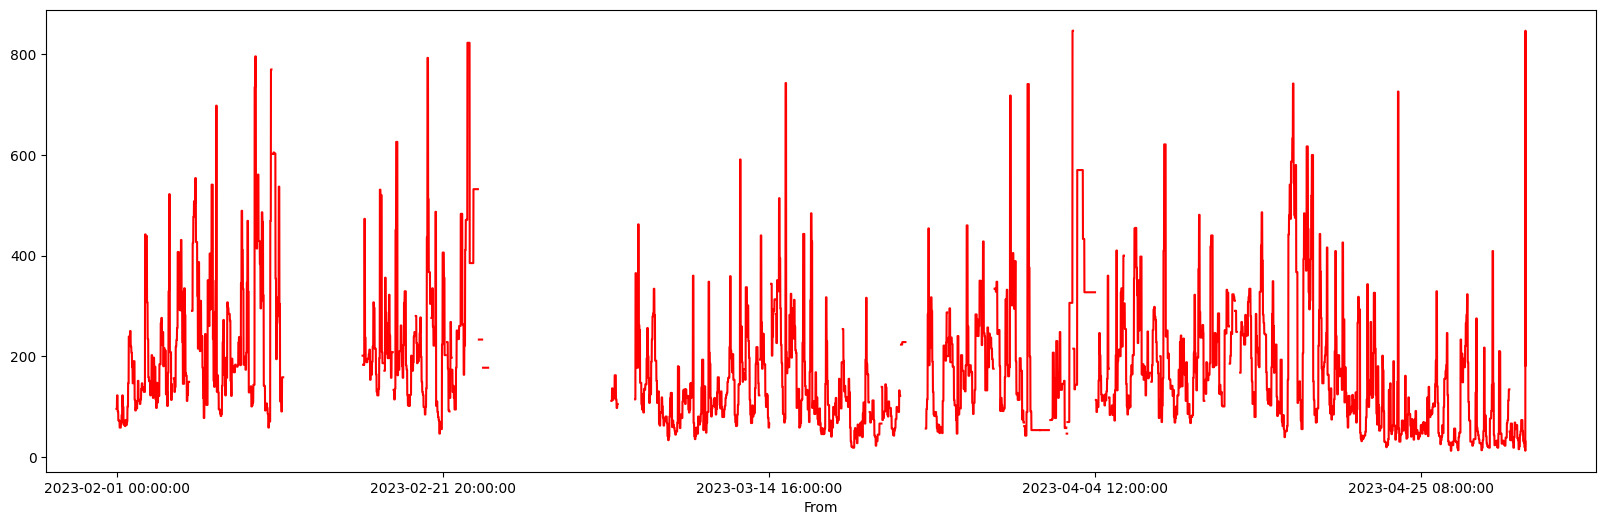

In [ ]:
df['PM10 (µg/m3)'].plot(figsize=(20,6), color = 'red')

In [ ]:
df2=df.dropna()

<Axes: xlabel='From'>

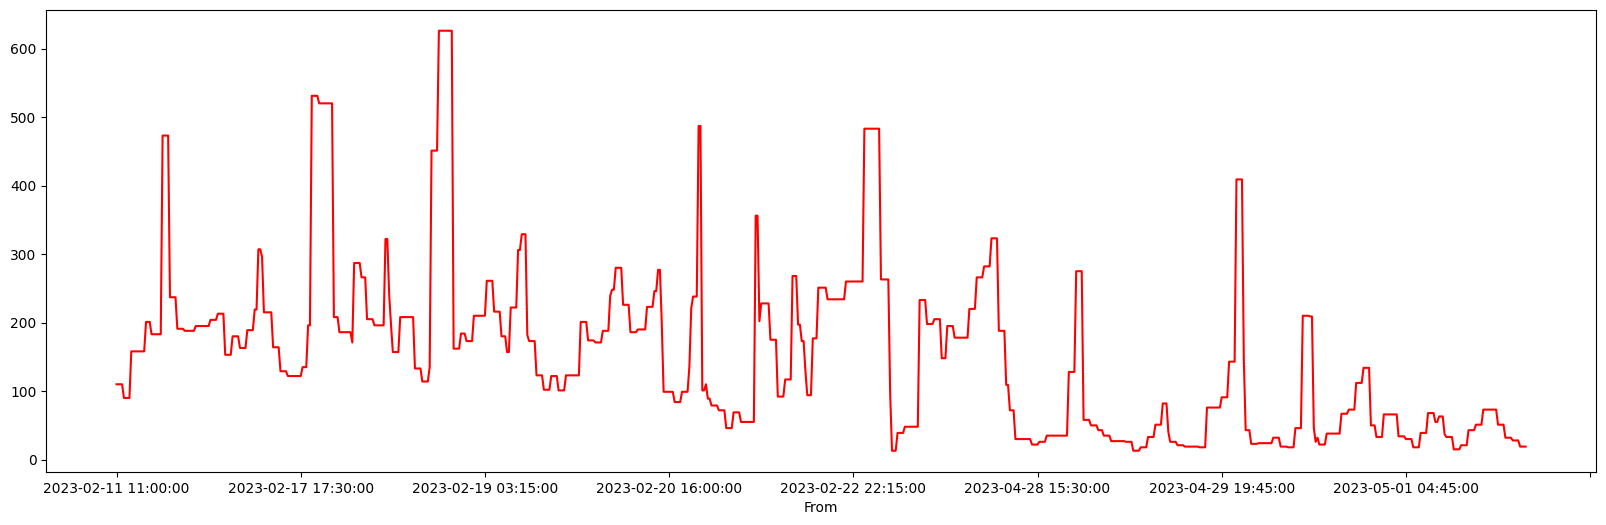

In [ ]:
df2['PM10 (µg/m3)'].plot(figsize=(20,6), color = 'red')

In [ ]:
from statsmodels.tsa.stattools import adfuller
def ad_test(dataset):
     df2test = adfuller(dataset, autolag = 'AIC')
     print("1. ADF : ",df2test[0])
     print("2. P-Value : ", df2test[1])
     print("3. Num Of Lags : ", df2test[2])
     print("4. Num Of Observations Used For ADF Regression:",      df2test[3])
     print("5. Critical Values :")
     for key, val in df2test[4].items():
         print("\t",key, ": ", val)
ad_test(df2['PM10 (µg/m3)'])

1. ADF :  -4.199738418758473
2. P-Value :  0.0006595723184032765
3. Num Of Lags :  12
4. Num Of Observations Used For ADF Regression: 753
5. Critical Values :
	 1% :  -3.4390641198617864
	 5% :  -2.8653859408474482
	 10% :  -2.5688179819544312


In [ ]:
from pmdarima import auto_arima
stepwise_fit = auto_arima(df2['PM10 (µg/m3)'], trace=True,
suppress_warnings=True)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=1.92 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=8104.874, Time=0.10 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=8105.778, Time=0.08 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=8105.593, Time=0.51 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=8102.879, Time=0.08 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=8098.878, Time=0.82 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=8100.872, Time=1.68 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=8100.871, Time=1.00 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=8103.360, Time=0.28 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=8103.773, Time=0.11 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=8096.883, Time=0.23 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=8103.598, Time=0.10 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=8103.782, Time=0.04 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=8098.876, Time=0.42 sec
 ARIMA(1,1,2)(0,0,0)[0]             : 

In [ ]:
print(df2.shape)
train=df2.iloc[:-30]
test=df2.iloc[-30:]
print(train.shape,test.shape)

(766, 12)
(736, 12) (30, 12)


In [ ]:
from statsmodels.tsa.arima.model import ARIMA
model = ARIMA(train['PM10 (µg/m3)'], order=(3, 1, 2))
model = model.fit()
model.summary()


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:           PM10 (µg/m3)   No. Observations:                  736
Model:                 ARIMA(3, 1, 2)   Log Likelihood               -3883.041
Date:                Mon, 26 Jun 2023   AIC                           7778.082
Time:                        18:10:59   BIC                           7805.681
Sample:                             0   HQIC                          7788.727
                                - 736                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0388      0.087      0.444      0.657      -0.132       0.210
ar.L2          0.7939      0.060     13.317      0.000       0.677       0.911
ar.L3         -0.0597      0.064     -0.929      0.353      -0.186       0.066
ma.L1         -0.0377      0.050     -0.762      0.446      -0.135       0.059
ma.L2         -0.9402      0.045    -20.744      0.000      -1.029      -0.851
sigma2      2267.3806     45.754     49.556      0.000    2177.704    2357.057
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):             21460.54
Prob(Q):                              0.95   Prob(JB):                         0.00
Heteroskedasticity (H):               0.37   Skew:                             0.33
Prob(H) (two-sided):                  0.00   Kurtosis:                        29.46
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
print(df.shape)
train = df2.iloc[:-0]
test = df2.iloc[-800:]
print(train.shape, test.shape)

(8643, 12)
(0, 12) (766, 12)


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


<Axes: xlabel='From'>

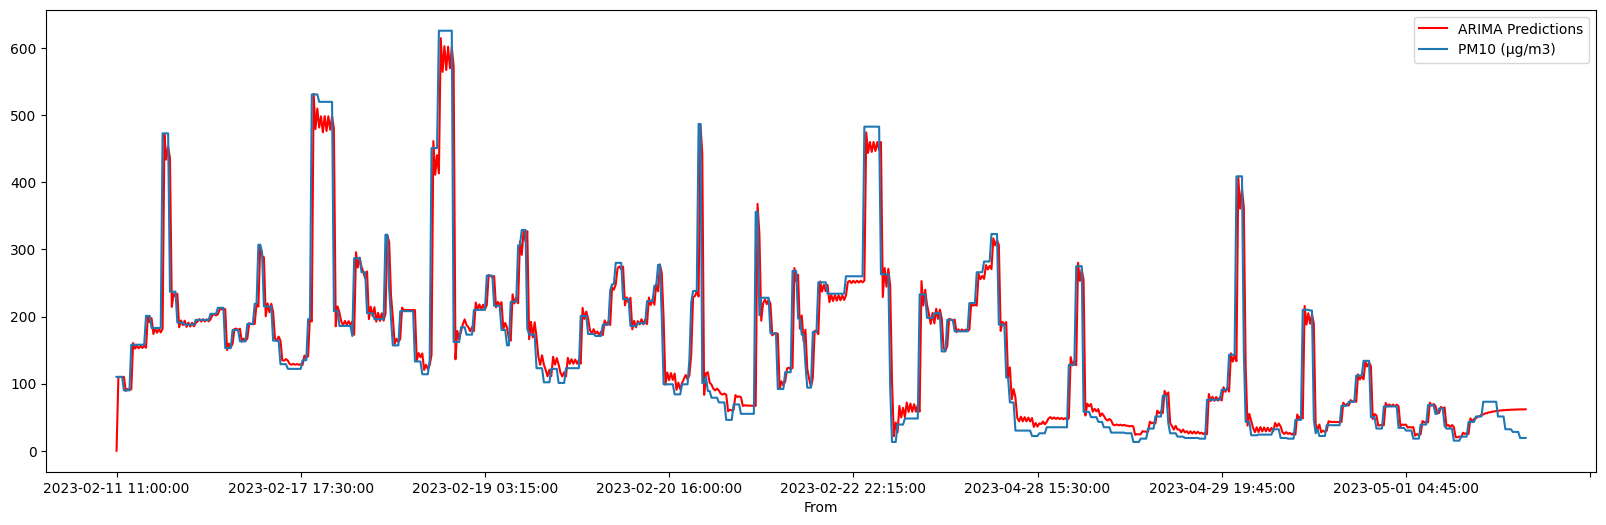

In [ ]:
start=len(train)
end=len(train)+len(test)-1
pred=model.predict(start=start,end=end,typ='levels').rename('ARIMA Predictions')
pred.plot(legend=True, color = 'red')
test['PM10 (µg/m3)'].plot(legend=True , figsize = (20,6))

In [ ]:
test['PM10 (µg/m3)'].mean()

151.16971279373368

In [ ]:
from sklearn.metrics import mean_squared_error
from math import sqrt
test['PM10 (µg/m3)'].mean()
rmse=sqrt(mean_squared_error(pred,test['PM10 (µg/m3)']))
print(rmse)

47.093524203356495


<Axes: xlabel='From'>

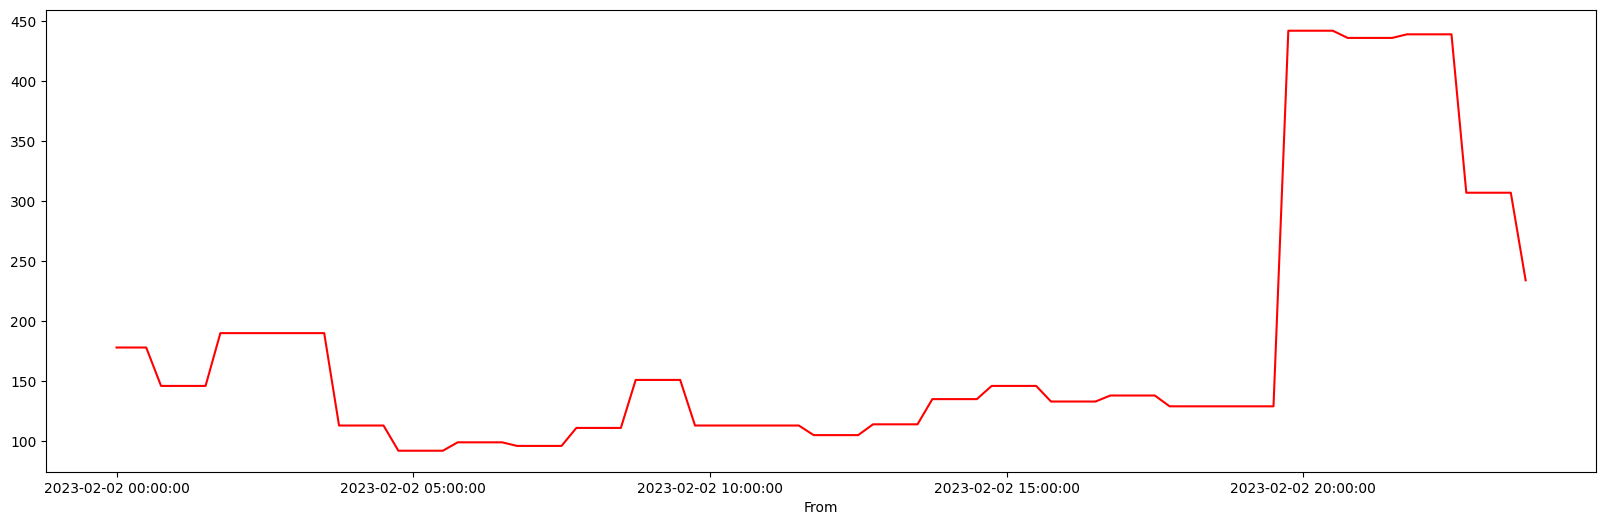

In [ ]:
import pandas as pd

# Define the starting row and ending row
starting_row = 97
ending_row = 192

# Extract the data from the specified rows
new_df = df.iloc[starting_row-1:ending_row]

new_df['PM10 (µg/m3)'].plot(figsize=(20,6), color = 'red')




In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.graphics.gofplots import qqplot

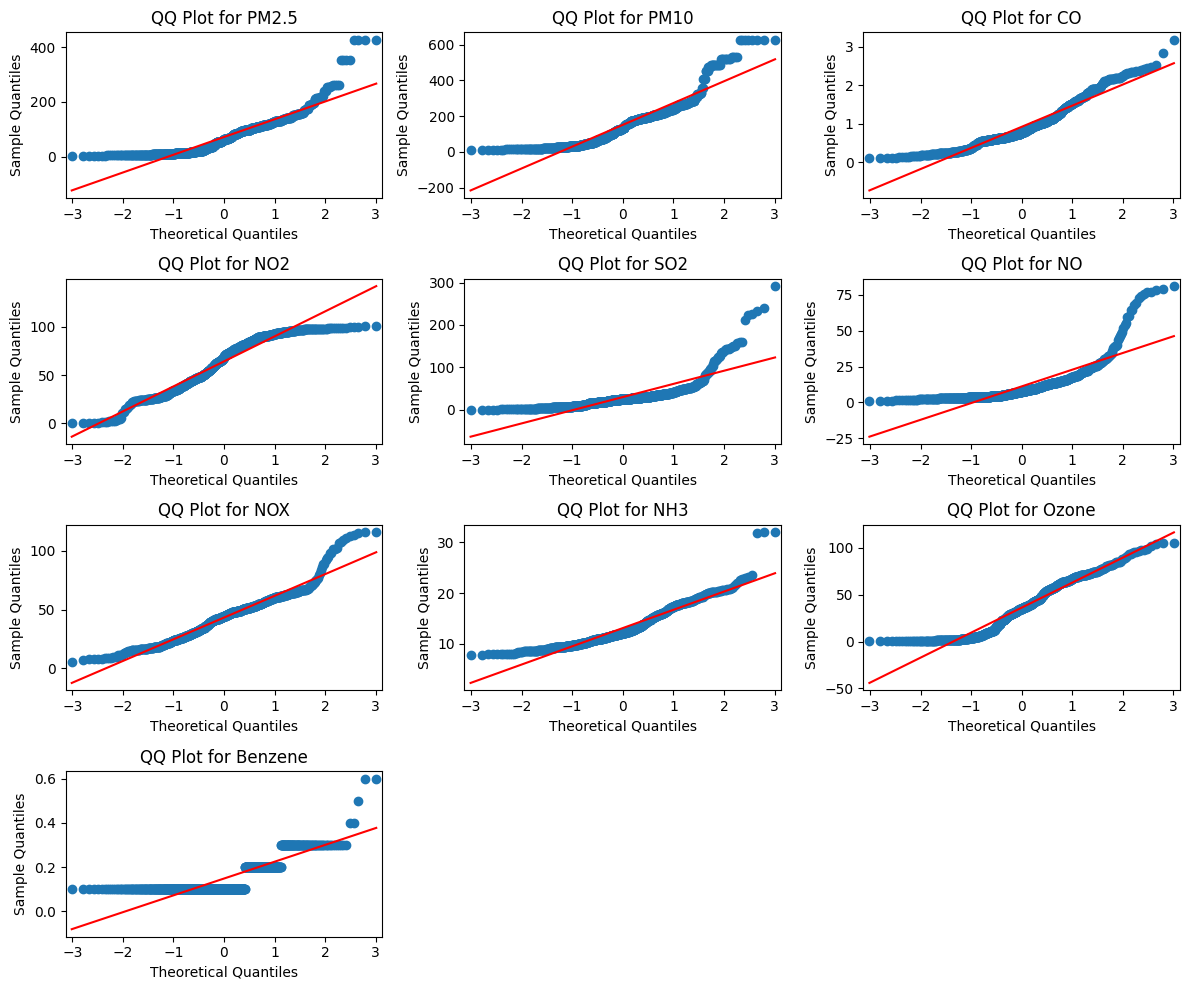

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.graphics.gofplots import qqplot


# Select the pollutant columns
pollutant_columns = ['PM2.5 (µg/m3)', 'PM10 (µg/m3)', 'CO (mg/m3)', 'NO2 (µg/m3)', 'SO2 (µg/m3)', 'NO (µg/m3)',
                     'NOX (ppb)', 'NH3 (µg/m3)', 'Ozone (µg/m3)', 'Benzene (µg/m3)']
pollutant_names = ['PM2.5', 'PM10', 'CO', 'NO2', 'SO2', 'NO', 'NOX', 'NH3', 'Ozone', 'Benzene']

# Set the figure size
plt.figure(figsize=(12, 10))

# Iterate over each pollutant and plot the QQ plot
for i, column in enumerate(pollutant_columns):
    plt.subplot(4, 3, i+1)
    qqplot(df2[column], line='s', ax=plt.gca())
    plt.title(f'QQ Plot for {pollutant_names[i]}')

# Adjust the plot layout
plt.tight_layout()

# Show the plots
plt.show()


In [ ]:
import pandas as pd

# Define the starting row, ending row, and row gap
starting_row = 56
ending_row = 8600
row_gap = 96

# Calculate the total number of rows to extract
num_rows = (ending_row - starting_row) // row_gap + 1

# Create a list to store the selected rows
selected_rows = []

# Iterate through the rows at the specified intervals and select the rows
for i in range(num_rows):
    row_index = starting_row + i * row_gap
    selected_rows.append(df.iloc[row_index])

# Create a new DataFrame from the selected rows
dg = pd.DataFrame(selected_rows)

# Print the selected rows
print(dg)


                        #   To (Interval: 15M)  PM10 (µg/m3)  PM2.5 (µg/m3)  \
2023-02-01 14:00:00    57  2023-02-01 14:15:00          73.0           18.0   
2023-02-02 14:00:00   153  2023-02-02 14:15:00         135.0           30.0   
2023-02-03 14:00:00   249  2023-02-03 14:15:00         147.0           24.0   
2023-02-04 14:00:00   345  2023-02-04 14:15:00           NaN            NaN   
2023-02-05 14:00:00   441  2023-02-05 14:15:00         149.0           23.0   
...                   ...                  ...           ...            ...   
2023-04-27 14:00:00  8217  2023-04-27 14:15:00          29.0           13.0   
2023-04-28 14:00:00  8313  2023-04-28 14:15:00          30.0           12.0   
2023-04-29 14:00:00  8409  2023-04-29 14:15:00          21.0            7.0   
2023-04-30 14:00:00  8505  2023-04-30 14:15:00          32.0            4.0   
2023-05-01 14:00:00  8601  2023-05-01 14:15:00          15.0            4.0   

                     NO (µg/m3)  NO2 (µg/m3)  NOX (

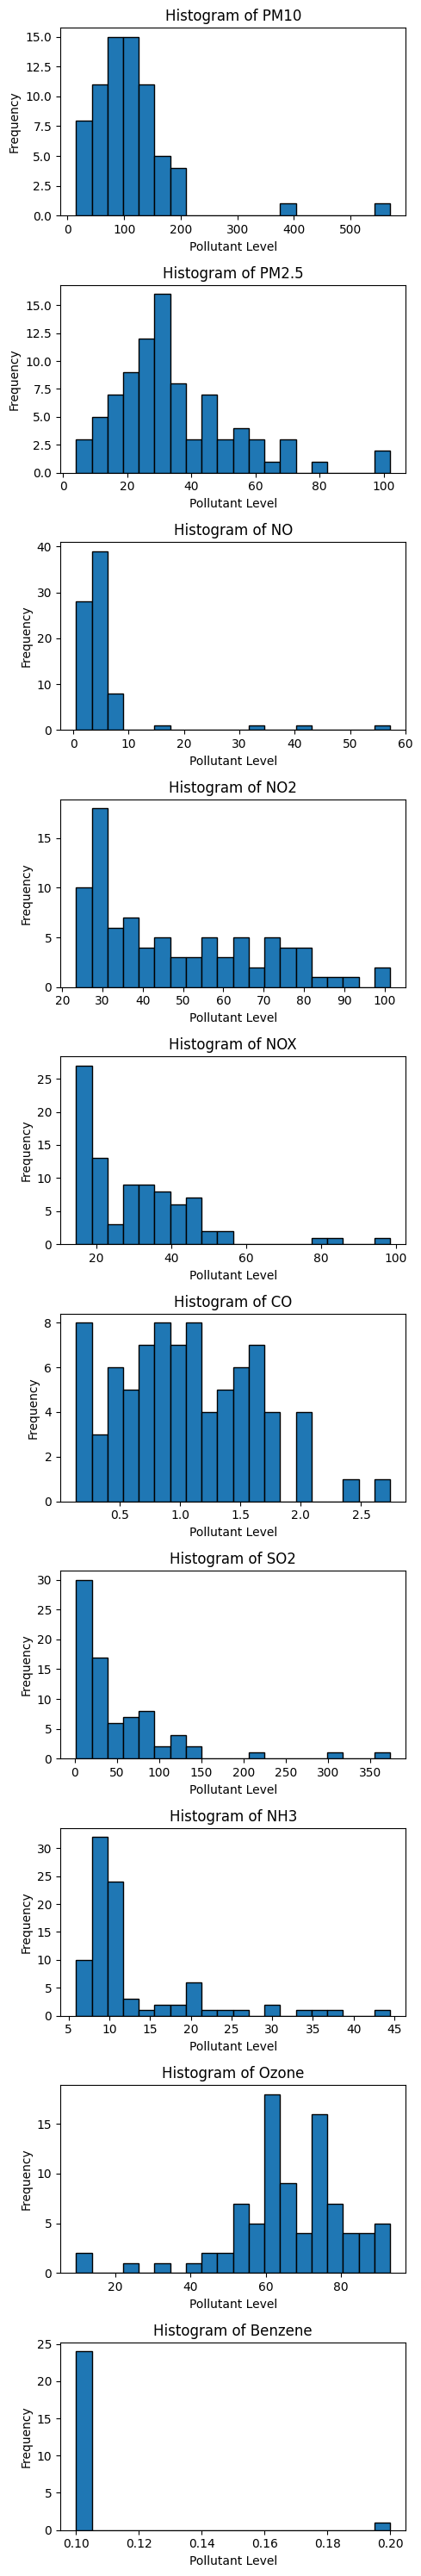

In [ ]:
import matplotlib.pyplot as plt

# Define the pollutant columns and names
pollutant_columns = ['PM10 (µg/m3)', 'PM2.5 (µg/m3)', 'NO (µg/m3)', 'NO2 (µg/m3)', 'NOX (ppb)',
                     'CO (mg/m3)', 'SO2 (µg/m3)', 'NH3 (µg/m3)', 'Ozone (µg/m3)', 'Benzene (µg/m3)']
pollutant_names = ['PM10', 'PM2.5', 'NO', 'NO2', 'NOX', 'CO', 'SO2', 'NH3', 'Ozone', 'Benzene']

# Set up the subplots
fig, axs = plt.subplots(len(pollutant_columns), 1, figsize=(5, 30))

# Iterate through each pollutant column and plot the histogram
for i, column in enumerate(pollutant_columns):
    ax = axs[i]
    pollutant_name = pollutant_names[i]

    # Plot the histogram
    ax.hist(dg[column].dropna(), bins=20, edgecolor='black')

    # Set the title and labels
    ax.set_title(f'Histogram of {pollutant_name}')
    ax.set_xlabel('Pollutant Level')
    ax.set_ylabel('Frequency')

# Adjust the layout and spacing
plt.tight_layout()

# Show the plot
plt.show()


In [ ]:
import pandas as pd

# Assuming your dataset is named 'df' and the PM2.5 column is already present



# Alternatively, create a new dataset to store AQI values
new_df_AQI = pd.DataFrame()
new_df_AQI['AQI'] = (df2['PM2.5 (µg/m3)'] - 71) * 3.414 + 201
print(new_df_AQI)


                        AQI
From                       
2023-02-11 11:00:00  47.370
2023-02-11 11:15:00  47.370
2023-02-11 11:30:00  47.370
2023-02-11 12:30:00  26.886
2023-02-11 12:45:00   2.988
...                     ...
2023-05-01 22:30:00 -17.496
2023-05-01 22:45:00  -3.840
2023-05-01 23:00:00  -3.840
2023-05-01 23:15:00  -3.840
2023-05-01 23:30:00  -3.840

[766 rows x 1 columns]


<Axes: xlabel='From'>

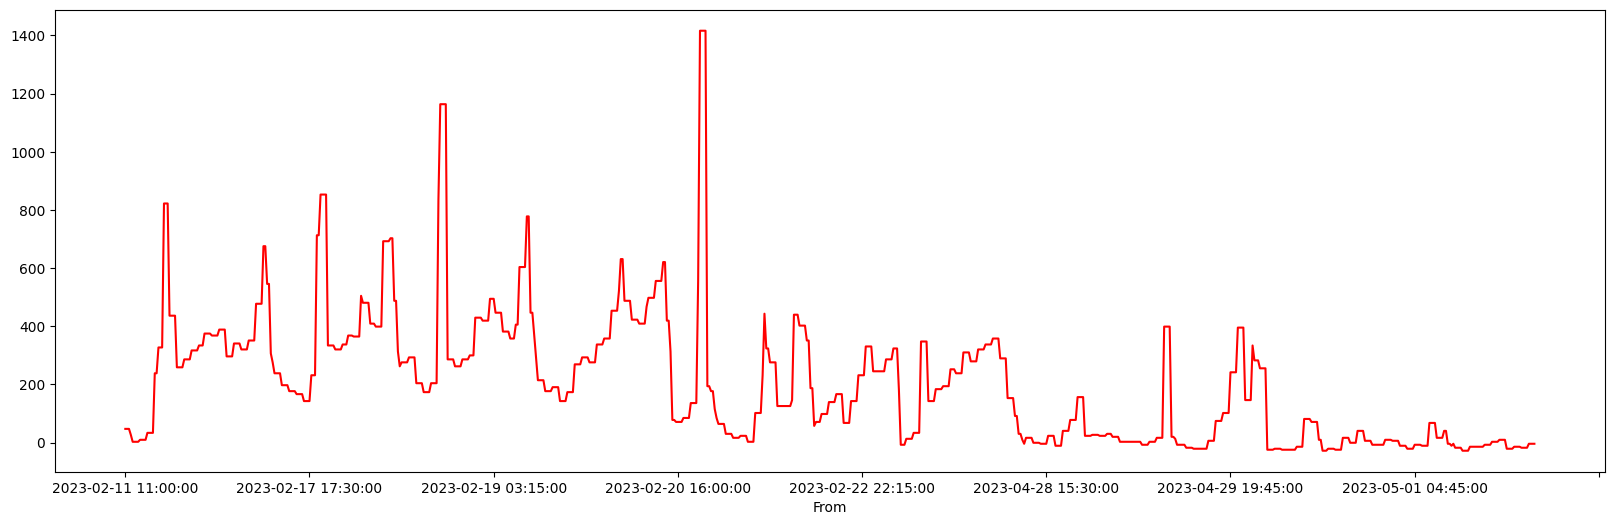

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming your dataset is named 'df' and the PM2.5 column is already present

# Alternatively, create a new dataset to store AQI values
new_df_AQI = pd.DataFrame()
new_df_AQI['AQI'] = (df2['PM2.5 (µg/m3)'] - 71) * 3.414 + 201

new_df_AQI['AQI'].plot(figsize=(20,6), color = 'red')

